    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [1]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
T_пир,\\ \hline
C & 900 & 1000 & 1100 & 1200 & 1300 & 1400 & 1500 & 1600 & 1700 & 1800 & 1900\\ \hline
U,\\ \hline
В & 1.710 & 1.973 & 2.449 & 2.942 & 3.214 & 3.891 & 4.660 & 5.287 & 6.243 & 7.245 & 7.797\\ \hline
I,\\ \hline
А & 0.485 & 0.511 & 0.558 & 0.603 & 0.627 & 0.684 & 0.745 & 0.793 & 0.861 & 0.929 & 0.964
\\ \hline



    Теперь основная часть:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Данные

In [51]:
T_FOR_EPS = np.array ([  800,   900,  1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,  1800,  1900,  2000])
EPS_T     = np.array ([0.067, 0.081, 0.105, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236, 0.249])

def NearestEps (T):
    if (T < T_FOR_EPS[0]):
        return EPS_T[0]

    for i_T in range (6): #it's stupid, but mne pohui
        if (abs (T_FOR_EPS[i_T] - T) <= 50):
            return EPS_T[i_T]

    # после 1400 зависимость линейная
    return (EPS_T[-1] - EPS_T[6]) / (T_FOR_EPS[-1] - T_FOR_EPS[6]) * (T - T_FOR_EPS[6]) + EPS_T[6]

In [4]:
T_br = list (map (int,   input ("T: ").split())) # in C
U    = list (map (float, input ("U: ").split()))
I    = list (map (float, input ("I: ").split()))

In [52]:
# Яркостная -> термодинамическая, подобрано на глазок. 
K_BR_TERM = 1.06
B_BR_TERM = -30

T_term = (np.array (T_br) + 273) * K_BR_TERM + B_BR_TERM # in K
W = np.array (U) * np.array (I)
eps_T = np.array ([NearestEps (T_term_i) for T_term_i in T_term])

print (*T_term)
print (*W)

ln_T = np.log (T_term)
ln_W = np.log (W)
ln_eps_T = np.log (eps_T)

1213.38 1319.38 1425.38 1531.38 1637.38 1743.38 1849.38 1955.38 2061.38 2167.38 2273.38
0.8293499999999999 1.008203 1.3665420000000001 1.774026 2.015178 2.6614440000000004 3.4717000000000002 4.192591 5.375223 6.730605000000001 7.5163079999999995
7.990912556982782e-12 6.418054587676693e-12 5.487006652491041e-12 4.9067720975511206e-12 3.940602969463623e-12 3.763486801241288e-12 3.6211306739589774e-12 3.2826412548824725e-12 3.208890654718808e-12 3.1067538359467055e-12 2.7166303148389397e-12


In [56]:
S = 0.36 # м^2
k_B = 1.38049e-23
c = 2.997928e10

sigma = W / eps_T / S / np.power (T_term, 4)
h = np.power ((2 * np.pi**5 * k_B**4 / 15 / c**2) / sigma, 1.0 / 3)

print ("sigma:\n", *sigma)
print ("h:\n", *h)

sigma:
 7.990912556982782e-12 6.418054587676693e-12 5.487006652491041e-12 4.9067720975511206e-12 3.940602969463623e-12 3.763486801241288e-12 3.6211306739589774e-12 3.2826412548824725e-12 3.208890654718808e-12 3.1067538359467055e-12 2.7166303148389397e-12
h:
 5.90918329930018e-34 6.357091351702239e-34 6.698040341654784e-34 6.952285934235587e-34 7.47949072127624e-34 7.59502933139617e-34 7.6932796994751776e-34 7.94910890102043e-34 8.009546892846253e-34 8.096375464258172e-34 8.466737078144352e-34


In [53]:
# МНК для ln. Берём область высоких температур (1700К)
i_high = 0
while (T_term[i_high] < 1700):
    i_high += 1

MNK_ln = MNK (ln_T[i_high : ln_T.size], ln_W[i_high : ln_T.size]) # пробовал -ln_epsT, выходит хуета.
MNK_ln.Print()

# МНК для обычного + график
k_not_ln = np.exp (MNK_ln.b)
T_linspace = np.linspace (min (T_term), max (T_term), 100)
W_linspace = np.power (T_linspace, MNK_ln.k) * k_not_ln

	k = 4.006602153089706
	b = -28.910424109377676
	sigma_k = 0.12182750165417709
	sigma_b = 0.0110414577948002


Графики

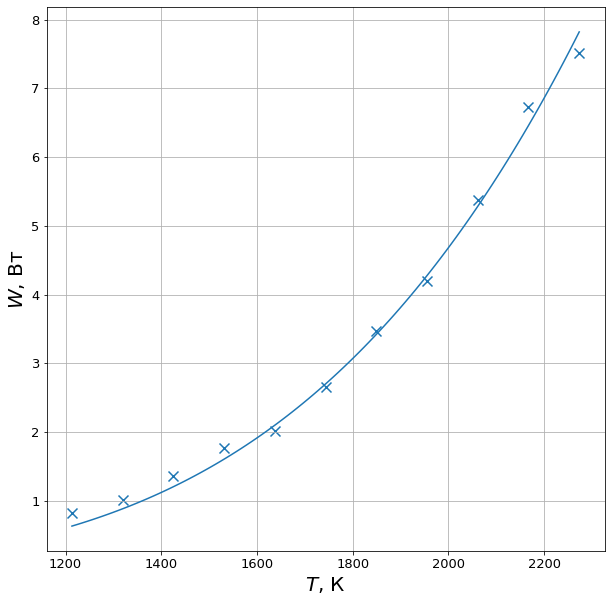

In [54]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (T_term, W, marker = 'x', s=100)
ax.plot (T_linspace, W_linspace)

ax.set_xlabel ('$T$, К',  fontsize = 20)
ax.set_ylabel ('$W$, Вт', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/graphW.pdf")

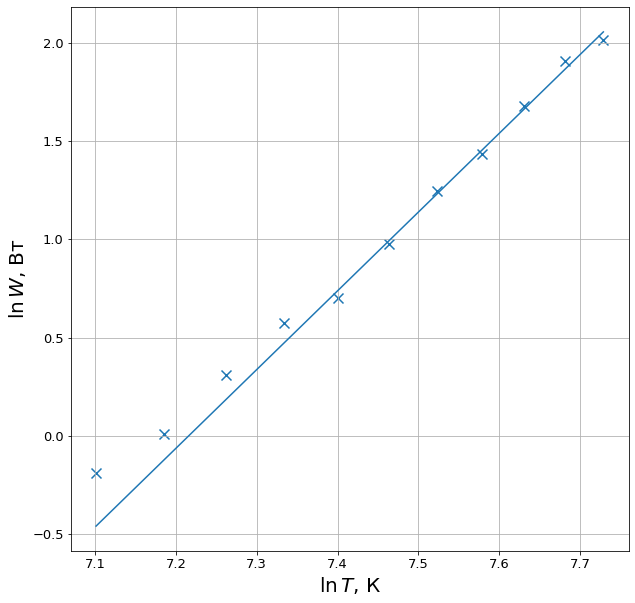

In [55]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

linear = lambda x: MNK_ln.k * x + MNK_ln.b

ax.scatter (ln_T, ln_W, marker = 'x', s=100)
ax.plot ([min (ln_T), max (ln_T)], [linear (min (ln_T)), linear (max (ln_T))])

ax.set_xlabel ('$\ln T$, К',  fontsize = 20)
ax.set_ylabel ('$\ln W$, Вт', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/graphlnW.pdf")